In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data =  pd.read_csv('multiclass.csv')

In [4]:
data

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204,2
436,3,39228,1431,764,4510,93,2346,2
437,3,14531,15488,30243,437,14841,1867,2
438,3,10290,1981,2232,1038,168,2125,3


In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
Y = data['class']
X = data.loc[:,'Region':'Delicassen']

In [8]:
X = pca.fit_transform(X)
df = pd.DataFrame(X,columns=['a','b'])

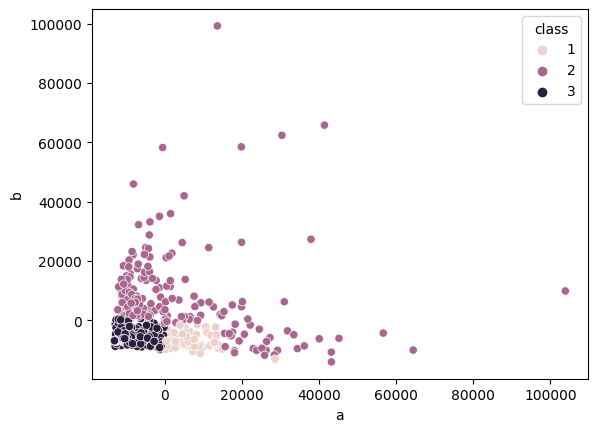

In [9]:
sns.scatterplot(data=df,x='a',y='b',hue=Y)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split as tts

In [11]:
xtrain_val,xtest,y_train_val,ytest = tts(X,Y,test_size=0.25,random_state=0)
xtrain,x_val,y_train,y_val = tts(xtrain_val,y_train_val,test_size=0.25,random_state=0)

In [12]:
print(xtrain.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(xtest.shape,ytest.shape)

(247, 2) (247,)
(83, 2) (83,)
(110, 2) (110,)


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
x_val = scaler.transform(x_val)
xtest = scaler.transform(xtest)

In [15]:
def KNN(X,Y,query,K=5):
    N = X.shape[0]
    d = X.shape[1]
    
    dist_labels = [((np.sqrt(np.sum(query-X[i]**2))),Y[i]) for i in range(N)]
    dist_labels = np.array(sorted(dist_labels,key = lambda x : x[0]))
    dist_labels_topk = dist_labels[:K,:]
    label,cnts = np.unique(dist_labels_topk,return_counts=True)
    indx_count = np.argmax(cnts)
    pred_label = label[indx_count]
    return int(pred_label)

In [19]:
KNN(xtrain,y_train,xtest[50],5)

C:\Users\gaura\AppData\Local\Temp\ipykernel_24224\2842861135.py:5: RuntimeWarning: invalid value encountered in sqrt
  dist_labels = [((np.sqrt(np.sum(query-X[i]**2))),Y[i]) for i in range(N)]


KeyError: 0